In [135]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
#import the dataset
df = pd.read_csv('insurance.csv')

In [137]:
df.shape

(1338, 7)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
#is there any null values or nan values in dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
#separate your dependent and independent variables
Y=df['charges']
X=df.drop('charges',axis=1)

In [47]:
#using iloc
Y_new = df.iloc[:,-1].values
X_new = df.iloc[:,:-1].values

In [48]:
X_new

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [27]:
#handle the null values/missing values
#fill randomly? or using procedure
#descriptive statistics to help us in decision making for filling the missing values
#lets suppose have missing values in children column
X_new['children'].skew()
#right skewed data / positively skewed

0.9383804401702414

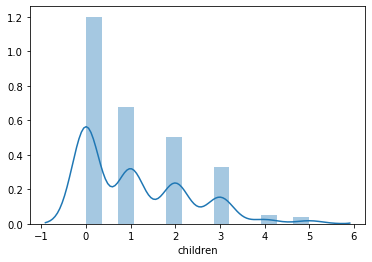

In [28]:
import seaborn as sns
sns.distplot(X_new['children'])

In [15]:
#which measure of central tendenacy you would have chosen
#mode which highest frequency data
#df['children'].fillna(0,inplace=True)
#df['children'].value_counts()

In [33]:
#categorical encoding #1st method
#pd.get_dummies(X)
X.replace('female',1,inplace=True)
X.replace('male',0,inplace=True)

In [35]:
X.replace('yes',1,inplace=True)
X.replace('no',0,inplace=True)

In [38]:
X = pd.get_dummies(X,drop_first=True)

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,0,0
1334,18,1,31.920,0,0,0,0,0
1335,18,1,36.850,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,1


In [41]:
X_new

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [44]:
#one method 
def change(x):
    if x=='female':
        return 1
    else:
        return 0
df['sex'].apply(change)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [45]:
X_new

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [56]:
#categorical encoding using sklearn library procedure
#label encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb = LabelEncoder()
X_new[:,1] = lb.fit_transform(X_new[:,1])

In [53]:
X_new[:,4]=lb.fit_transform(X_new[:,4])

In [63]:
X_new

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [94]:
#one hot enncoder
#encoding for dummy variables
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
X_data = ct.fit_transform(X_new)
X_data

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [99]:
X_data

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [114]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [116]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new_data = sc.fit_transform(X_data)

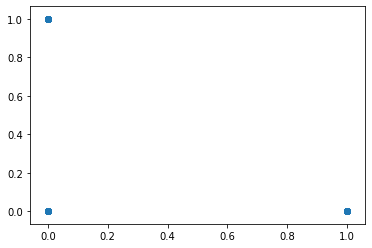

In [140]:
plt.scatter(X_data[:,0],X_data[:,1])

In [141]:
X_new_data

array([[-0.56526686, -0.56641788, -0.61132367, ..., -0.45332   ,
        -0.90861367,  1.97058663],
       [-0.56526686, -0.56641788,  1.63579466, ...,  0.5096211 ,
        -0.07876719, -0.5074631 ],
       [-0.56526686, -0.56641788,  1.63579466, ...,  0.38330685,
         1.58092576, -0.5074631 ],
       ...,
       [-0.56526686, -0.56641788,  1.63579466, ...,  1.0148781 ,
        -0.90861367, -0.5074631 ],
       [-0.56526686, -0.56641788, -0.61132367, ..., -0.79781341,
        -0.90861367, -0.5074631 ],
       [-0.56526686,  1.76548098, -0.61132367, ..., -0.26138796,
        -0.90861367,  1.97058663]])

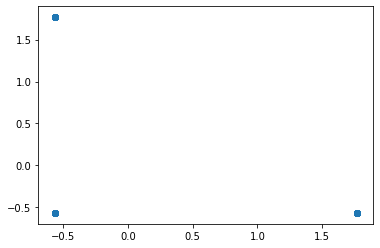

In [122]:
plt.scatter(X_new_data[:,0],X_new_data[:,1])

In [124]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_n_data = sc.fit_transform(X_data)
X_n_data

array([[0.        , 0.        , 0.        , ..., 0.3212268 , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.47914985, 0.2       ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45843422, 0.6       ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.56201238, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.26472962, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.35270379, 0.        ,
        1.        ]])

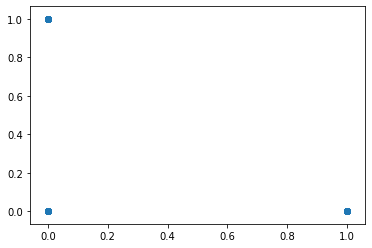

In [125]:
plt.scatter(X_n_data[:,0],X_n_data[:,1])

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new_data,Y,test_size=0.3)

In [128]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(936, 9)
(402, 9)
(936,)
(402,)


In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
Y_pred = lr.predict(X_test)
Y_pred[0:10]

array([11109.32966289,  8837.32966289, 32597.32966289,   725.32966289,
       37621.32966289,  3093.32966289,  9253.32966289,  1621.32966289,
       30581.32966289,  6565.32966289])

In [131]:
Y_test

1232    12479.70895
963      9500.57305
818     23401.30575
311      1737.37600
668     45710.20785
           ...     
63       4133.64165
1155     7228.21565
359      1607.51010
764      9095.06825
875      2690.11380
Name: charges, Length: 402, dtype: float64

In [133]:
lr.score(X_train,Y_train)

0.7466062436169963

In [134]:
lr.score(X_test,Y_test)

0.7541078451232084